<a href="https://colab.research.google.com/github/Ahmed-Shatla/Detect-Person-Class-from-img-Collage-project-./blob/main/Detect_Person_Class_CNN_without_Augmentation%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#needed libraries

In [1]:
import numpy as np
import pandas as pd
import os
import random 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import cv2


#data path and number of classes

In [5]:
data_path = '/content/drive/MyDrive/Faces data/CroppedYale'
len(os.listdir(data_path))

38

#Create lists that contain images and its labels

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
def read_img(path):
  files_names = os.listdir(path) 
  imgs = []
  target = []
  for i in files_names:
    for j in os.listdir(path+'/'+i):
      if '.pgm' in j:
        img = cv2.imread(path+'/'+i+'/'+j)
        imgs.append(img)
        target.append(i)
  return imgs,target

#X ==> Images
#y ==> labels

In [7]:
from sklearn.model_selection import train_test_split
X,y = read_img(data_path)


In [8]:
X = np.array(X)
y = np.array(y).reshape(-1,1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


#all images size = (192,168)

In [9]:
def resize_images(images):
  imgs = []
  images1 = np.asarray(images)
  for i in images1:
    img = cv2.resize(i,(168, 192))
    imgs.append(img)

  return imgs

In [10]:
images = resize_images(X)
images[1].shape

(192, 168, 3)

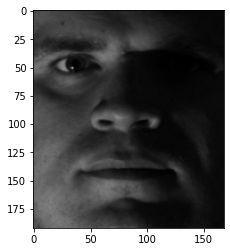

In [11]:
plt.imshow(X[20])

#Splitting data to 90% train and 10% test

In [12]:
X_train, X_test, y_train, y_test =train_test_split(images,y,test_size=0.1,shuffle=True,random_state=1)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [13]:
X_train.shape

(2223, 192, 168, 3)

In [14]:
y_train

array([['yaleB13'],
       ['yaleB10'],
       ['yaleB12'],
       ...,
       ['yaleB12'],
       ['yaleB08'],
       ['yaleB12']], dtype='<U7')

#CNN Model 1 ( without augmentation)

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dropout,Activation,MaxPool2D,Flatten

In [16]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(192,168,3)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))

model.add(Dense(units=38,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 190, 166, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 95, 83, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 93, 81, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 46, 40, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 38, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 22, 19, 64)       0

In [17]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_test.shape

(247, 38)

In [21]:
X_train.shape

(2223, 192, 168, 3)

In [22]:
train_gen = ImageDataGenerator()
valid_gen = ImageDataGenerator()

In [23]:
X_train, X_valid, y_train, y_valid =train_test_split(X_train,y_train,test_size=0.1,shuffle=True,random_state=1)
X_valid.shape

(223, 192, 168, 3)

In [24]:
trainG = train_gen.flow(X_train,y_train,batch_size=32)
validG = valid_gen.flow(X_valid,y_valid,batch_size=16)

In [25]:
steps_train = int(len(X_train)/32)
steps_validate = int(len(X_valid)/16)

In [29]:
history = model.fit_generator(trainG,
                                  steps_per_epoch=steps_train, 
                                  epochs=2,
                                  validation_data=validG,
                                  validation_steps=steps_validate,
                                  verbose=1,
                                  shuffle = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/2
62/62 [==============================] - 61s 974ms/step - loss: 0.2709 - accuracy: 0.9609 - val_loss: 0.2870 - val_accuracy: 0.9327
Epoch 2/2
62/62 [==============================] - 55s 885ms/step - loss: 0.3648 - accuracy: 0.9487 - val_loss: 0.6341 - val_accuracy: 0.9087


Text(0.5, 0, 'epochs')

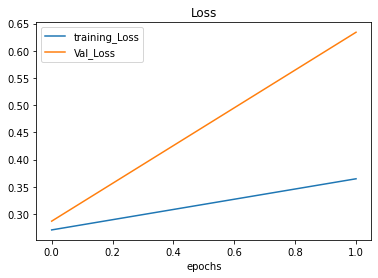

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training_Loss','Val_Loss'])
plt.title('Loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

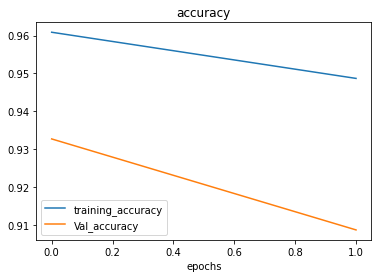

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training_accuracy','Val_accuracy'])
plt.title('accuracy')
plt.xlabel('epochs')

In [35]:
train_gen_augmanted = ImageDataGenerator(width_shift_range=.1,zoom_range=0.2,horizontal_flip=True,rotation_range=45)
trainGaug = train_gen_augmanted.flow(X_train,y_train,batch_size=32)


In [36]:
history = model.fit_generator(trainGaug,
                                  steps_per_epoch=steps_train, 
                                  epochs=2,
                                  validation_data=validG,
                                  validation_steps=steps_validate,
                                  verbose=1,
                                  shuffle = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/2
62/62 [==============================] - 71s 1s/step - loss: 3.9429 - accuracy: 0.0600 - val_loss: 3.0691 - val_accuracy: 0.3654
Epoch 2/2
62/62 [==============================] - 72s 1s/step - loss: 3.5644 - accuracy: 0.0833 - val_loss: 1.9197 - val_accuracy: 0.5433


In [1]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training_Loss','Val_Loss'])
plt.title('Loss')
plt.xlabel('epochs')

NameError: ignored